{'Venezuela': 8.35, 'Switzerland': 7.04, 'Norway': 6.3, 'Sweden': 6.2, 'States': 5.65}


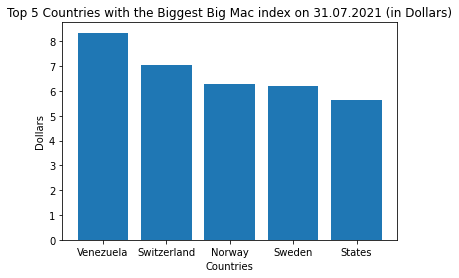

In [22]:
import pandas as pd
import requests
import itertools
import matplotlib.pyplot as plt

api_key = "TVs8ffu3J_DwSH89U4Xy"

df = pd.read_csv('ECONOMIST_metadata.csv')
first_column = list(df.iloc[:, 0])

list_of_nations = []

dollar_prices = {}

for i in first_column:
    list_of_nations.append(i[-3:])

for nation in list_of_nations:
    response = requests.get(
        "https://data.nasdaq.com/api/v3/datasets/ECONOMIST/BIGMAC_"+nation+".json?api_key="+api_key)

    if response.ok == True:
        data = response.json()
        name = data["dataset"]["name"].split()[-1]
        dollar_price = round(data["dataset"]["data"][1][3], 2)
        dollar_prices[name] = dollar_price
    else:
        None

sorted_dict = {k: v for k, v in sorted(
    dollar_prices.items(), key=lambda v: v[1], reverse=True)}

dict_of_5_biggest_dollars_values = dict(
    itertools.islice(sorted_dict.items(), 5))

print(dict_of_5_biggest_dollars_values)


countries = list(dict_of_5_biggest_dollars_values.keys())
sorted_dolar_prices = list(dict_of_5_biggest_dollars_values.values())

plt.bar(countries, sorted_dolar_prices)
plt.title("Top 5 Countries with the Biggest Big Mac index on 31.07.2021 (in Dollars)")
plt.xlabel("Countries")
plt.ylabel("Dollars")
plt.show()


